In [4]:
from wgangp import WGANGP

import torch
import matplotlib.pyplot as plt
import numpy as np

from utils import load_model, load_yaml

In [5]:
# Set the configuration
config = load_yaml("/home/seungwon/Projects/deep-learning-projects/cv-08-wasserstein-generative-adversarial-network-gradient-penalty-pytorch/config/wgangp_cifar10_config.yml")

# Training setting
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(config['data']['seed'])
if device == 'cuda':
  torch.cuda.manual_seed_all(config['data']['seed'])

# Set the model
model = WGANGP(gen_latent_z=config['model']['gen_latent_z'], gen_init_layer=config['model']['gen_init_layer'],
            gen_conv_trans=config['model']['gen_conv_trans'], gen_conv_filters=config['model']['gen_conv_filters'],
            gen_conv_kernels=config['model']['gen_conv_kernels'], gen_conv_strides=config['model']['gen_conv_strides'],
            gen_conv_pads=config['model']['gen_conv_pads'],gen_dropout_rate=config['model']['gen_dropout_rate'],
            crt_input_img=config['model']['crt_input_img'], crt_conv_filters=config['model']['crt_conv_filters'],
            crt_conv_kernels=config['model']['crt_conv_kernels'], crt_conv_strides=config['model']['crt_conv_strides'],
            crt_conv_pads=config['model']['crt_conv_pads'], crt_dropout_rate=config['model']['crt_dropout_rate']).to(device)
model, _, _, _ = load_model('/home/seungwon/Projects/deep-learning-projects/cv-08-wasserstein-generative-adversarial-network-gradient-penalty-pytorch/models/cifar10/2023.08.02.14.05.32/cifar10_last.pt', model)
print(model)

Load the yaml file from /home/seungwon/Projects/deep-learning-projects/cv-08-wasserstein-generative-adversarial-network-gradient-penalty-pytorch/config/wgangp_cifar10_config.yml
Loaded the model from /home/seungwon/Projects/deep-learning-projects/cv-08-wasserstein-generative-adversarial-network-gradient-penalty-pytorch/models/cifar10/2023.07.25.19.05.17/cifar10_last.pt successfully
WGANGP(
  (G): Generator(
    (fc): Linear(in_features=100, out_features=3136, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (conv): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
        (1): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU()
      )
      (1): Sequential(
        (0): ConvTranspose2d(128, 128, kernel_size=(2, 2), stride=(2, 2))
        (1): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


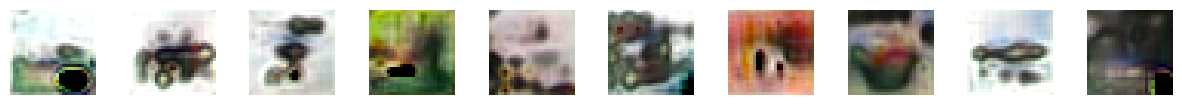

In [6]:
n_to_show = 10
z_latent = config['model']['gen_latent_z']
np.random.seed(777)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
model.eval()

z = 2 * torch.rand(n_to_show, z_latent, device=device) - 1
img = model.G(z)

for i in range(n_to_show):     
    sub = fig.add_subplot(1, n_to_show, i+1)
    sub.axis('off')
    sub.imshow(img[i].permute(1, 2, 0).cpu().detach().numpy())
